### Funding dataset results

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.colors import ListedColormap
from scipy.interpolate import interp1d

from fairness_measure import discrimination, all_fairness, statistical_parity
from modeling import datasets, get_results, weight_estimation, reweighing
from pre_process import pre_process_raw_data, preparing_dataframe
import modeling

%config Completer.use_jedi = False

import warnings


warnings.simplefilter('ignore')

plt.rcParams['figure.figsize'] = (8, 5)
# plt.style.use('fivethirtyeight')

## Dataset Reader

In [3]:
name = 'funding'

In [4]:
df = datasets(name)

In [5]:
df.shape

(612262, 113)

## Baselines
- (0)(vanilla) Train once + test on entire future (sequentially) (average) (no fairness)
- (1)(static) Train once + test on entire future (sequentially) (average)
- (2)(dynamic) Train on entire past + test on immediate future (+ average)

- Ours: (2) + forecasting 

#### (0) (vanilla)

In [6]:
baseline_0_results, full_results_0, batches_0 = modeling.baseline_0(df)

Train on 2005-01
Test on 2005-02
Test on 2005-03
Test on 2005-04
Test on 2005-05
Test on 2005-06
Test on 2005-07
Test on 2005-08
Test on 2005-09
Test on 2005-10
Test on 2005-11
Test on 2005-12
Test on 2006-01
Test on 2006-02
Test on 2006-03
Test on 2006-04
Test on 2006-05
Test on 2006-06
Test on 2006-07
Test on 2006-08
Test on 2006-09
Test on 2006-10
Test on 2006-11
Test on 2006-12
Test on 2007-01
Test on 2007-02
Test on 2007-03
Test on 2007-04
Test on 2007-05
Test on 2007-06
Test on 2007-07
Test on 2007-08
Test on 2007-09
Test on 2007-10
Test on 2007-11
Test on 2007-12
Test on 2008-01
Test on 2008-02
Test on 2008-03
Test on 2008-04
Test on 2008-05
Test on 2008-06
Test on 2008-07
Test on 2008-08
Test on 2008-09
Test on 2008-10
Test on 2008-11
Test on 2008-12
Test on 2009-01
Test on 2009-02
Test on 2009-03
Test on 2009-04
Test on 2009-05
Test on 2009-06
Test on 2009-07
Test on 2009-08
Test on 2009-09
Test on 2009-10
Test on 2009-11
Test on 2009-12
Test on 2010-01
Test on 2010-02
Test on

In [7]:
baseline_0_results

auc    0.650765
S.P    0.309047
TPR    0.317531
FPR    0.247552
GAP    0.282542
dtype: float64

In [8]:
baseline_0_results = baseline_0_results.to_numpy()

#### (1) (static)

In [9]:
baseline_1_results, full_results_1, batches_1 = modeling.baseline_1(df)

Train on 2005-01
Test on 2005-02
Test on 2005-03
Test on 2005-04
Test on 2005-05
Test on 2005-06
Test on 2005-07
Test on 2005-08
Test on 2005-09
Test on 2005-10
Test on 2005-11
Test on 2005-12
Test on 2006-01
Test on 2006-02
Test on 2006-03
Test on 2006-04
Test on 2006-05
Test on 2006-06
Test on 2006-07
Test on 2006-08
Test on 2006-09
Test on 2006-10
Test on 2006-11
Test on 2006-12
Test on 2007-01
Test on 2007-02
Test on 2007-03
Test on 2007-04
Test on 2007-05
Test on 2007-06
Test on 2007-07
Test on 2007-08
Test on 2007-09
Test on 2007-10
Test on 2007-11
Test on 2007-12
Test on 2008-01
Test on 2008-02
Test on 2008-03
Test on 2008-04
Test on 2008-05
Test on 2008-06
Test on 2008-07
Test on 2008-08
Test on 2008-09
Test on 2008-10
Test on 2008-11
Test on 2008-12
Test on 2009-01
Test on 2009-02
Test on 2009-03
Test on 2009-04
Test on 2009-05
Test on 2009-06
Test on 2009-07
Test on 2009-08
Test on 2009-09
Test on 2009-10
Test on 2009-11
Test on 2009-12
Test on 2010-01
Test on 2010-02
Test on

In [10]:
baseline_1_results

auc    0.655401
S.P    0.152651
TPR    0.151714
FPR    0.108083
GAP    0.129898
dtype: float64

In [11]:
baseline_1_results = baseline_1_results.to_numpy()

#### 2) (Dynamic)

In [12]:
full_results_2 = pd.read_csv('./results/funding_baseline2.csv')

### Ours Results -> d = 9

In [15]:
Ours = pd.read_csv('./results/full_results_9.csv')

In [16]:
Ours['S.P'].mean(axis=0)

0.06414831409902914

## Temporal Visualization

In [19]:
def temporal_visualization(name):
    full_results_0['Time'] = batches_0[1:]
    full_results_1['Time'] = batches_0[1:]
    full_results_2['Time'] = batches_0[1:]
    Ours['Time'] = batches_0[3:]
    
    fig, axs = plt.subplots(2, 2, figsize=(18,10))

    sns.lineplot(ax=axs[0,0], data=full_results_0[2:], x='Time', y='auc', label = 'Vanilla')
    sns.lineplot(ax=axs[0,0], data=full_results_1[2:], x='Time', y='auc', label = 'Static')
    sns.lineplot(ax=axs[0,0], data=full_results_2[2:], x='Time', y='auc', label = 'Dynamic')
    sns.lineplot(ax=axs[0,0], data=Ours, x='Time', y='auc', label = 'Ours', color = 'black')
    
    #axs[0,0].set(xlabel='Time', ylabel='AUC')
    axs[0,0].set_xlabel('Time', fontsize = 15)
    axs[0,0].set_ylabel('AUC', fontsize = 15)
    
    
    new_ticks = full_results_0[2:]['Time'].values
    axs[0,0].set_xticks(range(0, len(new_ticks), 10))
    axs[0,0].set_xticklabels(new_ticks[::10], fontsize=11)
    
    
  


    sns.lineplot(ax=axs[0,1], data=full_results_0[2:], x='Time', y='S.P', label = 'Vanilla')
    sns.lineplot(ax=axs[0,1], data=full_results_1[2:], x='Time', y='S.P', label = 'Static')
    sns.lineplot(ax=axs[0,1], data=full_results_2[2:], x='Time', y='S.P', label = 'Dynamic')
    sns.lineplot(ax=axs[0,1], data=Ours, x='Time', y='S.P', label = 'Ours', color = 'black')
    #axs[0,1].set(xlabel='Time', ylabel='Δ S.P')
    axs[0,1].set_xlabel('Time', fontsize = 15)
    axs[0,1].set_ylabel('Δ S.P', fontsize = 15)
    
    axs[0,1].set_xticks(range(0, len(new_ticks), 10))
    axs[0,1].set_xticklabels(new_ticks[::10], fontsize=11)
    
   

    sns.lineplot(ax=axs[1,0], data=full_results_0[2:], x='Time', y='TPR', label = 'Vanilla')
    sns.lineplot(ax=axs[1,0], data=full_results_1[2:], x='Time', y='TPR', label = 'Static')
    sns.lineplot(ax=axs[1,0], data=full_results_2[2:], x='Time', y='TPR', label = 'Dynamic')
    sns.lineplot(ax=axs[1,0], data=Ours, x='Time', y='TPR', label = 'Ours', color = 'black')
    #axs[1,0].set(xlabel='Time', ylabel='Δ TPR')
    axs[1,0].set_xlabel('Time', fontsize = 15)
    axs[1,0].set_ylabel('Δ TPR', fontsize = 15)
    
    
    
    axs[1,0].set_xticks(range(0, len(new_ticks), 10))
    axs[1,0].set_xticklabels(new_ticks[::10], fontsize=11)
    

    sns.lineplot(ax=axs[1,1], data=full_results_0[2:], x='Time', y='FPR', label = 'Vanilla')
    sns.lineplot(ax=axs[1,1], data=full_results_1[2:], x='Time', y='FPR', label = 'Static')
    sns.lineplot(ax=axs[1,1], data=full_results_2[2:], x='Time', y='FPR', label = 'Dynamic')
    sns.lineplot(ax=axs[1,1], data=Ours, x='Time', y='FPR', label = 'Ours', color = 'black')
    #axs[1,1].set(xlabel='Time', ylabel='Δ FPR')
    axs[1,1].set_xlabel('Time', fontsize = 15)
    axs[1,1].set_ylabel('Δ FPR', fontsize = 15)
    
    
    axs[1,1].set_xticks(range(0, len(new_ticks), 10))
    axs[1,1].set_xticklabels(new_ticks[::10], fontsize=11)
    
    

    plt.tight_layout()
    plt.savefig(f'./results/{name}_temporal.png')

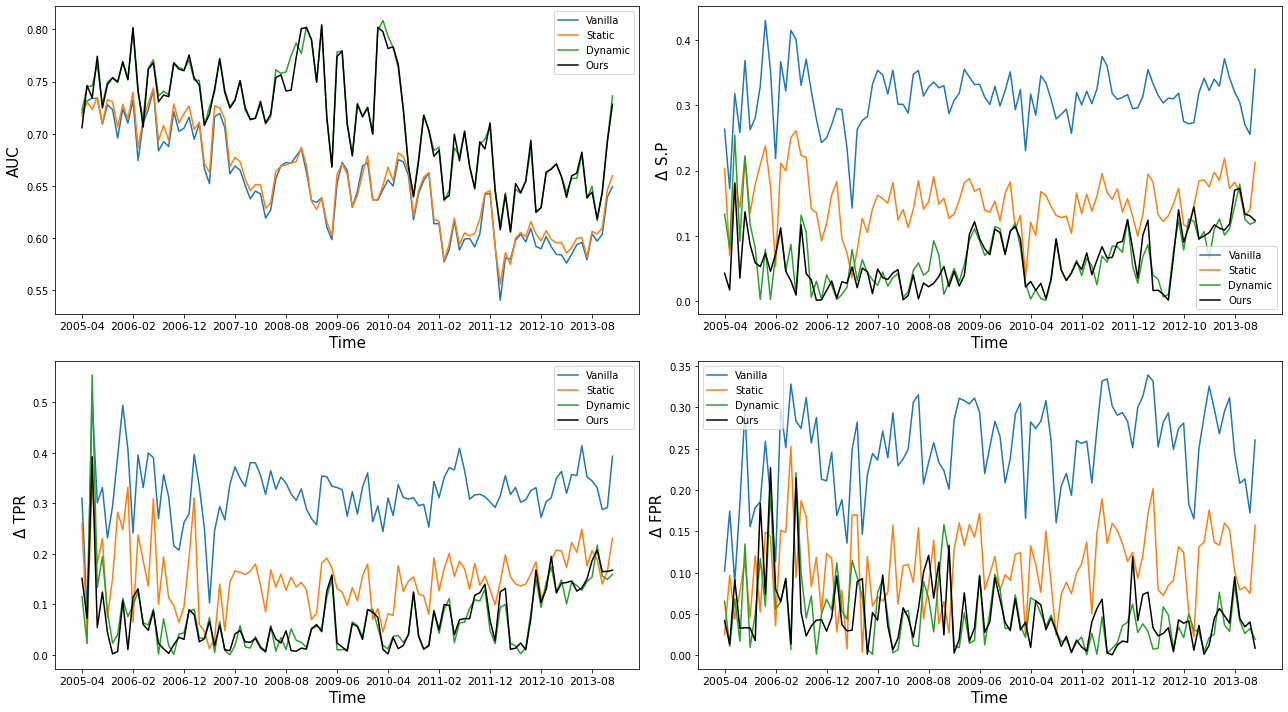

In [20]:
temporal_visualization('funding')

### Trade-off plotting

In [21]:
if name == 'jigsaw':
    d = 0
    full_results_0['Time'] = batches_0[1:]
    full_results_1['Time'] = batches_1[1:]
    full_results_2['Time'] = batches_2[1:]
    ours = Ours.copy()
    ours['Time'] = batches_0[1:]
        
elif name == 'funding':
    d = 9
    
elif name == 'adult':
    d = 9

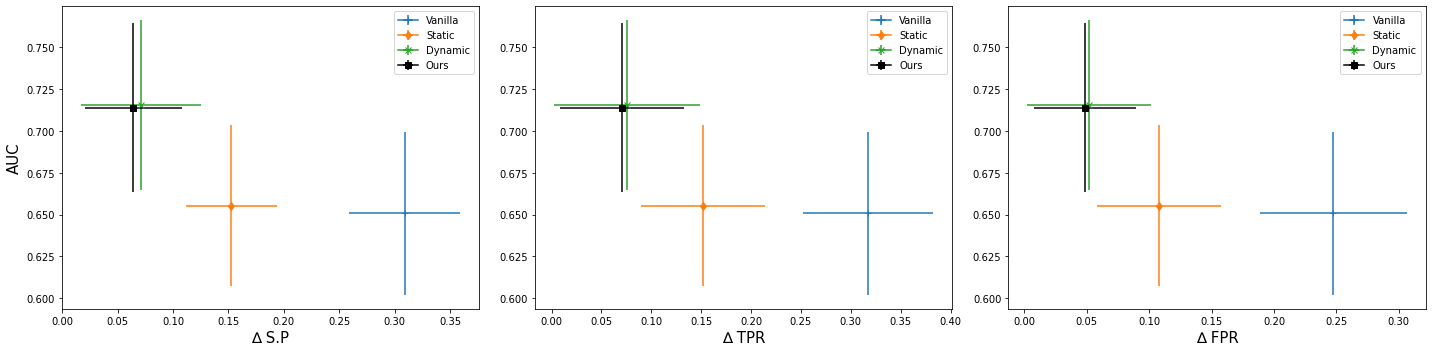

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

#'S.P'
axs[0].errorbar(full_results_0['S.P'].mean(axis=0), full_results_0['auc'].mean(axis=0), xerr=full_results_0['S.P'].std(axis=0), yerr=full_results_0['auc'].std(axis=0), marker = '+', label = 'Vanilla')
axs[0].errorbar(full_results_1['S.P'].mean(axis=0), full_results_1['auc'].mean(axis=0), xerr=full_results_1['S.P'].std(axis=0), yerr=full_results_1['auc'].std(axis=0), marker = 'd', label = 'Static')
axs[0].errorbar(full_results_2['S.P'].mean(axis=0), full_results_2['auc'].mean(axis=0), xerr=full_results_2['S.P'].std(axis=0), yerr=full_results_2['auc'].std(axis=0), marker = 'x', label = 'Dynamic')
axs[0].errorbar(Ours['S.P'].mean(axis=0), Ours['auc'].mean(axis=0), xerr=Ours['S.P'].std(axis=0), yerr=Ours['auc'].std(axis=0), color='black', marker = 's', label = 'Ours')
axs[0].legend()


#'TPR'
axs[1].errorbar(full_results_0['TPR'].mean(axis=0), full_results_0['auc'].mean(axis=0), xerr=full_results_0['TPR'].std(axis=0), yerr=full_results_0['auc'].std(axis=0), marker = '+', label = 'Vanilla')
axs[1].errorbar(full_results_1['TPR'].mean(axis=0), full_results_1['auc'].mean(axis=0), xerr=full_results_1['TPR'].std(axis=0), yerr=full_results_1['auc'].std(axis=0), marker = 'd', label = 'Static')
axs[1].errorbar(full_results_2['TPR'].mean(axis=0), full_results_2['auc'].mean(axis=0), xerr=full_results_2['TPR'].std(axis=0), yerr=full_results_2['auc'].std(axis=0), marker = 'x', label = 'Dynamic')
axs[1].errorbar(Ours['TPR'].mean(axis=0), Ours['auc'].mean(axis=0), xerr=Ours['TPR'].std(axis=0), yerr=Ours['auc'].std(axis=0), color='black', marker = 's', label = 'Ours')
axs[1].legend()

#'FPR'
axs[2].errorbar(full_results_0['FPR'].mean(axis=0), full_results_0['auc'].mean(axis=0), xerr=full_results_0['FPR'].std(axis=0), yerr=full_results_0['auc'].std(axis=0), marker = '+', label = 'Vanilla')
axs[2].errorbar(full_results_1['FPR'].mean(axis=0), full_results_1['auc'].mean(axis=0), xerr=full_results_1['FPR'].std(axis=0), yerr=full_results_1['auc'].std(axis=0), marker = 'd', label = 'Static')
axs[2].errorbar(full_results_2['FPR'].mean(axis=0), full_results_2['auc'].mean(axis=0), xerr=full_results_2['FPR'].std(axis=0), yerr=full_results_2['auc'].std(axis=0), marker = 'x', label = 'Dynamic')
axs[2].errorbar(Ours['FPR'].mean(axis=0), Ours['auc'].mean(axis=0), xerr=Ours['FPR'].std(axis=0), yerr=Ours['auc'].std(axis=0), color='black', marker = 's', label = 'Ours')
axs[2].legend()

axs[0].set_ylabel('AUC', fontsize = 15)
axs[0].set_xlabel('∆ S.P', fontsize = 15)
axs[1].set_xlabel('∆ TPR', fontsize = 15)
axs[2].set_xlabel('∆ FPR', fontsize = 15)
        
        

plt.tight_layout()
plt.savefig(f'./results/{name}.png')

In [ ]:
Ours